# Predictive posterior distribution

## General setup

Poisson distribution:

\begin{equation}
    p(n|\lambda)
    =
    \frac{\lambda^{n} e^{-\lambda}}{n!}
\end{equation}

Posterior for the parameter $\lambda$:

\begin{equation}
    p(\lambda | n_{obs})
    =
    \frac{p(n_{obs},\lambda,M) p(\lambda, M)}{ p(n_{obs},M) }
\end{equation}


Posterior predictive distribution:

\begin{equation}
    p(n | n_{obs})
    =
    \int~
    d\lambda
    ~
    p(n | \lambda)
    p(\lambda | n_{obs})
\end{equation}

## Single observation and non-informative prior

Choosing a non-informative prior:

\begin{equation}
    p(\lambda|M)
    =
    \Theta(\lambda)
\end{equation}

yields and evidence of

\begin{equation}
    p(n_{obs}|M)
    =
    \int
    d\lambda~
    \frac{\lambda^{n_{obs}} e^{-\lambda}}{n_{obs}!}
    \Theta(\lambda)
    = 1.
\end{equation}

The corresponding posterior predictive distribution:

\begin{equation}
    p(n|n_{obs})
    =
    \frac{(n+n_{obs})!}{n! n_{obs}!}
    2^{-n_{obs}-1-n}
\end{equation}

In [37]:
import numpy as np
import scipy.stats
from scipy.misc import factorial
from scipy.stats import poisson
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
scipy.stats.nbinom

In [15]:
def calc_predictive_posterior(N, N_obs):
    
    p = factorial(N+N_obs)/(factorial(N)*factorial(N_obs))*0.5**(N+N_obs+1)
    
    return p

In [58]:
Ns = range(0, 30, 1)
N_obs = 10

In [59]:
ps = np.array([calc_predictive_posterior(N, N_obs) for N in Ns])

In [60]:
poisson_pdf = np.array([poisson.pmf(N, mu=N_obs) for N in Ns])

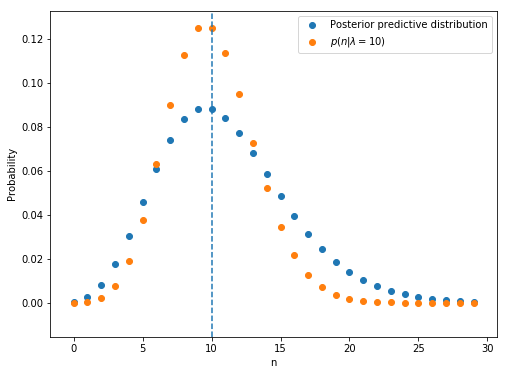

In [63]:
f,a = plt.subplots(figsize=(8,6))
a.scatter(Ns, ps, label='Posterior predictive distribution')
a.scatter(Ns, poisson_pdf, label='$p(n | \lambda=10)$')
a.set_xlabel('n')
a.set_ylabel('Probability')
a.axvline(N_obs, linestyle='--')
a.legend()

In [62]:
ps.sum()

0.99888928311338532